In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data["Class"] = data["Class"].astype(int)
data.shape

(1000, 3)

In [4]:
data.head()

,Feature1,Feature2,Class
0,2.234198,-1.940597,2
1,1.941637,-1.270985,2
2,3.647365,-3.027789,2
3,1.184157,-0.404223,1
4,2.261972,-1.775996,2


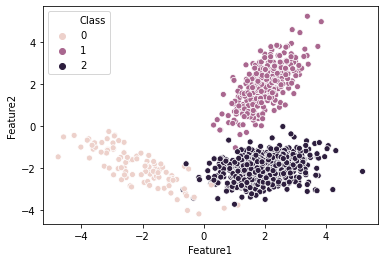

In [5]:
#Lets plot the data and see the classes
sns.scatterplot(data.iloc[:,0],data.iloc[:,1],hue = data.iloc[:,2])

First step is to claculate the mean for each class

In [6]:
mu0 = [np.mean(data[data["Class"]==0].iloc[:,0]),np.mean(data[data["Class"]==0].iloc[:,1])]
mu0

[-2.095569267898685, -1.9734203982106444]

In [7]:
mu1 = [np.mean(data[data["Class"]==1].iloc[:,0]),np.mean(data[data["Class"]==1].iloc[:,1])]
mu1

[2.008751836773456, 1.911481331850417]

In [8]:
mu2 = [np.mean(data[data["Class"]==2].iloc[:,0]),np.mean(data[data["Class"]==2].iloc[:,1])]
mu2

[1.996228124982381, -2.0192129829115957]

In [9]:
mu = [mu0,mu1,mu2]

Now we will calculate the covariance matrix which is the same for each class as assumed by LDA. Please refer to the intro document for the formula used here.

In [10]:
cov = np.zeros((2,2))
for k in range(2):
    for i in data[data["Class"]==k].index.tolist():
        x = np.reshape(np.array(data.iloc[i,:-1]),(2,1))
        cov+= np.dot((x-mu[k]),np.transpose(x-mu[k]))
cov/=(data.shape[0]-3)

In [11]:
cov

array([[0.4779847 , 0.1046364 ],
       [0.1046364 , 0.76700539]])

Finally we have to calculate the pi or the fraction of data of each class

In [12]:
pi0 = data[data["Class"]==0].shape[0]/data.shape[0]
pi0

0.1

In [13]:
pi1 = data[data["Class"]==1].shape[0]/data.shape[0]
pi1

0.3

In [14]:
pi2 = data[data["Class"]==2].shape[0]/data.shape[0]
pi2

0.6

In [15]:
pi = [pi0,pi1,pi2]

Everything required to do for LDA is done. Now lets plot the decision boundary and see how well it is classifying.<br />
But what is defined as a decision boundary?<br />
A decision boundary between two classes is a line(in this case) where if a new data point is found, it has equal probability of being in both the classes. Or in other words, the Linear Discriminant Function value for both the classes is equal at this boundary

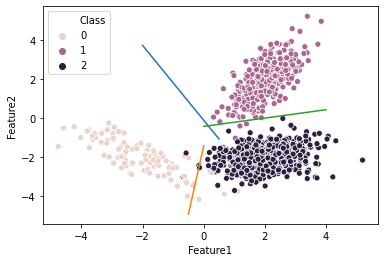

In [18]:
'''
Dont worry, I've done the calculation for you
The values are an approximation
boundary between class 0 and class 1:
feature2 = -1.92feature1 - 0.1143

boundary between class 1 and class 2:
feature2 = 0.2139feature1 - 0.4277

boundary between class 0 and class 1:
feature2 = 6.9843feature1 - 1.422
'''
x01 = [-2,0.5]
y01 = [a*-1.92 - 0.1143 for a in x01]
x12 = [0,4]
y12 = [a*0.2139 - 0.4277 for a in x12]
x20 = [-0.5,0]
y20 = [a*6.9843 - 1.422 for a in x20]
sns.scatterplot(data.iloc[:,0],data.iloc[:,1],hue = data.iloc[:,2])
sns.lineplot(x01,y01)#Blue line
sns.lineplot(x20,y20)#Orange line
sns.lineplot(x12,y12)#Green line


Great, the algorithm is doing a pretty good job, but again, the data is linearly separable so in-case it wasn't, QDA was the way to go. Now lets see how this is applied using sklearn.

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()

In [20]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [21]:
LDA.fit(X,y)

LinearDiscriminantAnalysis()

And its that easy. All the values we had calculated above have now been calculated and stored.<br />
Lets now create some data or in this case some points, plot it and see which class it should belong to and then see what the LDA object says.

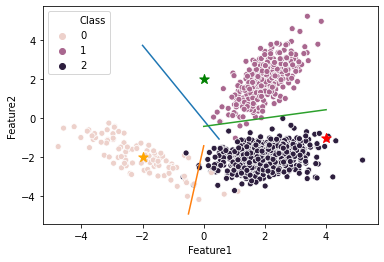

In [42]:
point1 = np.array([-2,-2])
point2 = np.array([0,2])
point3 = np.array([4,-1])
#Lets plot these points and see
sns.scatterplot(data.iloc[:,0],data.iloc[:,1],hue = data.iloc[:,2])
sns.lineplot(x01,y01)#Blue line
sns.lineplot(x20,y20)#Orange line
sns.lineplot(x12,y12)#Green line
plt.scatter(point1[0],point1[1],marker = '*',s=100,c='orange')
plt.scatter(point2[0],point2[1],marker = '*',s=100,c='green')
plt.scatter(point3[0],point3[1],marker = '*',s=100,c='red')

So according to the plots,<br />
* point1 belongs to class 0
* point2 belongs to class 1
* point3 belongs to class 2

In [44]:
classP1 = LDA.predict(point1.reshape(1,-1))
classP2 = LDA.predict(point2.reshape(1,-1))
classP3 = LDA.predict(point3.reshape(1,-1))

print("Point1 belongs to class",classP1)
print("Point1 belongs to class",classP2)
print("Point1 belongs to class",classP3)

Point1 belongs to class [0]
Point1 belongs to class [1]
Point1 belongs to class [2]


The algorithm also, of course, says the same thing. 